# Scientific Python
## Classifcation

* Supervised Learning
    * Classification
    * Regression
* Unsupervised Learning
* Reinforcement Learning

### Classification

* Linear Classifiers: Logistic Regression, Naive Bayes Classifier
* Nearest Neighbor
* Support Vector Machines
* Decision Trees
* Random Forest
* Neural Networks

# Linear models

<img src="imgs/linear.png" width="400px">

## K-Nearest Neighbor

<img src="imgs/knn.png" width="400px">

## Support Vector Machine

<img src="imgs/svm.png" width="600px">

In [34]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [98]:
# loading MNIST data
mnist = fetch_openml("mnist_784")


In [38]:
def plot_mnist_img(img_array):
    img = img_array.reshape((28,28))

    plt.imshow(img, cmap="binary")

In [99]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


(70000, 784)
(70000,)


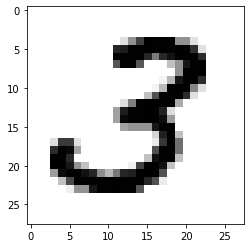

In [103]:

X = mnist["data"]
y = mnist["target"]
print(X.shape)
print(y.shape)

plot_mnist_img(X[341])



In [104]:
# training and test sets

shuffle_indexes = np.random.permutation(70000)
X, y = X[shuffle_indexes], y[shuffle_indexes]
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]



6


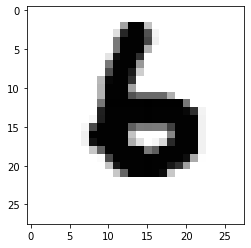

In [42]:
# plot_mnist_img(X_train[300])
# print(y_train[300])

## Binary classfication

### SGD Classifier (Linear classification with Stochastic Gradient Descent Implementation)

In [105]:
y_train = y_train.astype(np.int8)
y_test = y_train.astype(np.int8)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [107]:
print(y_train_5)

[False False False ... False False False]


In [108]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=7)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=7, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [115]:
print(sgd_classifier.predict([X_test[9999]]))
print(y_test[9999])

[False]
1


## Performance measures

### Accuracy. Cross validation

<img src="imgs/crossval.png" width="500px">

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [116]:
y_preds = sgd_classifier.predict(X_test)
print(accuracy_score(y_test_5, y_preds))
  
print(cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring="accuracy"))

0.9354
[0.95585 0.9553  0.9528 ]


# Confusion matrix

<img src="imgs/confusmat.png" width="500px">

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53218,  1401],
       [ 1320,  4061]])

## Precision, Recall

<img src="imgs/confusmat_2.png" width="200px">


Precision - accuracy of the positive predictions

`precision = TP / (TP + FP)`

Recall - sensitivity - true positive rate (TPR)

`recall = TP / (TP +  FN)`

In [118]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_train_5, y_train_pred)
print(prec)

recall = recall_score(y_train_5, y_train_pred)
print(recall)


0.7435005492493592
0.7546924363501208


## Decision function

In [90]:
scores = sgd_classifier.decision_function(X_train)
print("Min: {0}".format( np.min(scores)))
print("Max: {0}".format( np.max(scores)))

Min: -48638.65205935512
Max: 11815.729476264449


## Precision Recall Curve

In [119]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Min: -164654.45829367757
Max: 50158.67003073225


(0, 1)

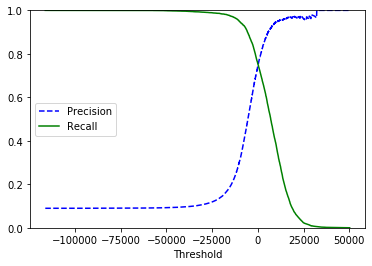

In [120]:
# plotting
print("Min: {0}".format( np.min(y_scores)))
print("Max: {0}".format( np.max(y_scores)))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])


Text(0, 0.5, 'precision')

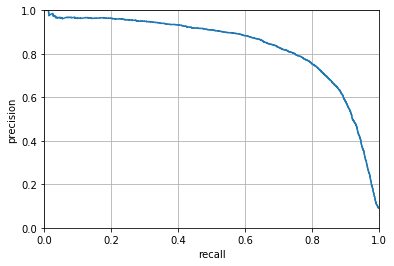

In [97]:
plt.plot(recalls, precisions)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()
plt.xlabel("recall")
plt.ylabel("precision")

# Classroom tasks

* Apply KNN to the same ML problem
* Evaluate your model using basic metrics
* Try to implement multiclass classification (learn about OneVersusAll, OneVersusOne approaches). How to do it using sklearn packages? What will happen if we pass to the SGDClassifier a training dataset with multiclass labels? Eplain the behavior of SGDClassifier object.